<a href="https://www.kaggle.com/code/ahmed3okka/pg-s4-e7-eda-modeling-submission?scriptVersionId=190355254" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **1. Understanding the Problem and Objective:**
Before diving into the data, we need understand the problem we are trying to solve and the goals of our analysis. This helps in directing our exploration and identifying relevant patterns.For this Health Insurance data,this dataset is about an Insurance company that has provided Health Insurance to its customers. Now we need build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

# **2. Importing libraries and Loading the Dataset:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv
/kaggle/input/health-insurance-cross-sell-prediction-data/train.csv
/kaggle/input/health-insurance-cross-sell-prediction-data/test.csv


In [2]:
df_test = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction-data/test.csv')
pg = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction-data/train.csv')

pg_test = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')
df = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
sample = pd.read_csv('/kaggle/input/playground-series-s4e7/sample_submission.csv')

# **3. Checking the Structure of the Dataset:**

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
df.shape , pg.shape , df_test.shape, pg_test.shape

((11504798, 12), (381109, 12), (127037, 11), (7669866, 11))

In [5]:
df.drop('id',inplace=True,axis=1)
pg.drop('id',inplace=True,axis=1)
df_test.drop('id',inplace=True,axis=1)
pg_test.drop('id',inplace=True,axis=1)

In [6]:
df.shape , pg.shape , df_test.shape, pg_test.shape

((11504798, 11), (381109, 11), (127037, 10), (7669866, 10))

In [7]:
def columns_info(data):
  cols = []
  dtypes = []
  unique_v = []
  n_unique_v = []

  for col in data.columns:
    cols.append(col)
    dtypes.append(data[col].dtype)
    unique_v.append(data[col].unique())
    n_unique_v.append(data[col].nunique())

  return pd.DataFrame({'cols':cols,'dtypes':dtypes,'unique_v':unique_v,'n_unique_v':n_unique_v})

In [8]:
columns_info(df)

,cols,dtypes,unique_v,n_unique_v
0,Gender,object,"[Male, Female]",2
1,Age,int64,"[21, 43, 25, 35, 36, 31, 23, 47, 26, 66, 22, 2...",66
2,Driving_License,int64,"[1, 0]",2
3,Region_Code,float64,"[35.0, 28.0, 14.0, 1.0, 15.0, 47.0, 45.0, 8.0,...",54
4,Previously_Insured,int64,"[0, 1]",2
5,Vehicle_Age,object,"[1-2 Year, > 2 Years, < 1 Year]",3
6,Vehicle_Damage,object,"[Yes, No]",2
7,Annual_Premium,float64,"[65101.0, 58911.0, 38043.0, 2630.0, 31951.0, 2...",51728
8,Policy_Sales_Channel,float64,"[124.0, 26.0, 152.0, 156.0, 160.0, 8.0, 31.0, ...",152
9,Vintage,int64,"[187, 288, 254, 76, 294, 197, 190, 262, 36, 12...",290


In [9]:
columns_info(pg)

,cols,dtypes,unique_v,n_unique_v
0,Gender,object,"[Male, Female]",2
1,Age,int64,"[44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3...",66
2,Driving_License,int64,"[1, 0]",2
3,Region_Code,float64,"[28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,...",53
4,Previously_Insured,int64,"[0, 1]",2
5,Vehicle_Age,object,"[> 2 Years, 1-2 Year, < 1 Year]",3
6,Vehicle_Damage,object,"[Yes, No]",2
7,Annual_Premium,float64,"[40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ...",48838
8,Policy_Sales_Channel,float64,"[26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ...",155
9,Vintage,int64,"[217, 183, 27, 203, 39, 176, 249, 72, 28, 80, ...",290


In [10]:
df = pd.concat([pg, df])  # Merge both datasets

# **4. Checking the Duplicate and Missing Values in the Dataset:**

In [11]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing #'] = df.isna().sum()
    sum['missing %'] = (df.isna().sum())/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    return sum
summary(df)

,dtypes,missing #,missing %,uniques,count
Gender,object,0,0.0,2,11885907
Age,int64,0,0.0,66,11885907
Driving_License,int64,0,0.0,2,11885907
Region_Code,float64,0,0.0,54,11885907
Previously_Insured,int64,0,0.0,2,11885907
Vehicle_Age,object,0,0.0,3,11885907
Vehicle_Damage,object,0,0.0,2,11885907
Annual_Premium,float64,0,0.0,53456,11885907
Policy_Sales_Channel,float64,0,0.0,156,11885907
Vintage,int64,0,0.0,290,11885907


As We Can See There Are No Duplicate Values And Missing Values


In [12]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(11885638, 11)

In [13]:
pg_test.duplicated().sum() , df_test.duplicated().sum()

(0, 37)

# **5. Exploratory Data Analysis(EDA)**

In [14]:
sns.set(style="darkgrid")

In [15]:
# sns.pairplot(df)

In [16]:
# plt.figure(figsize=(7, 4))
# sns.boxplot(x=df['Annual_Premium'])
# plt.title('Distribution of Annual_Premium')
# plt.xlabel('Annual_Premium')
# plt.ylabel('Frequency')
# plt.show()

In [17]:
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Age'], kde=False, bins=10)
# plt.title('Distribution of Age')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

In [18]:
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Region_Code'], kde=False, bins=12)
# plt.title('Distribution of Region_Code')
# plt.xlabel('Region_Code')
# plt.ylabel('Frequency')
# plt.show()

In [19]:
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Vehicle_Age'], kde=False, bins=10)
# plt.title('Distribution of Vehicle_Age')
# plt.xlabel('Vehicle_Age')
# plt.ylabel('Frequency')
# plt.show()

In [20]:
# #Checking If training data is Imbalanced
# response_data = df['Response'].value_counts()
# plt.figure(figsize=(6,6))
# fig, ax = plt.subplots()
# ax.pie(response_data, labels = [0,1])
# ax.set_title('Checking Imbalance in Training Data Or Response')
# plt.show()

In [21]:
corr_df = df.drop(['Gender','Vehicle_Age','Vehicle_Damage'],axis=1)

<Axes: >

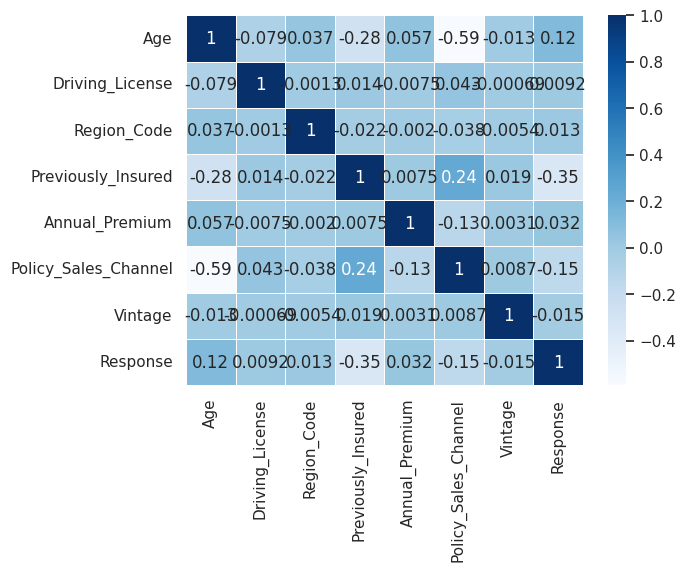

In [22]:
corr = corr_df.corr()
sns.heatmap(corr,annot=True,cmap='Blues',linewidth=.5)

# **6. Feature Engineering**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11885638 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ GB


In [24]:
encoded_features = pd.get_dummies(df,drop_first=True,dtype=int,columns=['Driving_License','Gender','Previously_Insured','Vehicle_Age','Vehicle_Damage'])

In [25]:
columns_info(encoded_features)

,cols,dtypes,unique_v,n_unique_v
0,Age,int64,"[44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3...",66
1,Region_Code,float64,"[28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,...",54
2,Annual_Premium,float64,"[40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ...",53456
3,Policy_Sales_Channel,float64,"[26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ...",156
4,Vintage,int64,"[217, 183, 27, 203, 39, 176, 249, 72, 28, 80, ...",290
5,Response,int64,"[1, 0]",2
6,Driving_License_1,int64,"[1, 0]",2
7,Gender_Male,int64,"[1, 0]",2
8,Previously_Insured_1,int64,"[0, 1]",2
9,Vehicle_Age_< 1 Year,int64,"[0, 1]",2


In [26]:
pg_test = pd.get_dummies(pg_test,drop_first=True,dtype=int,columns=['Driving_License','Gender','Previously_Insured','Vehicle_Age','Vehicle_Damage'])

In [27]:
columns_info(pg_test)

,cols,dtypes,unique_v,n_unique_v
0,Age,int64,"[20, 47, 22, 51, 23, 21, 72, 33, 67, 34, 25, 2...",66
1,Region_Code,float64,"[47.0, 28.0, 43.0, 19.0, 30.0, 20.0, 37.0, 48....",53
2,Annual_Premium,float64,"[2630.0, 37483.0, 24502.0, 34115.0, 25715.0, 3...",50044
3,Policy_Sales_Channel,float64,"[160.0, 124.0, 26.0, 152.0, 29.0, 1.0, 122.0, ...",151
4,Vintage,int64,"[228, 123, 271, 115, 148, 245, 11, 171, 97, 72...",290
5,Driving_License_1,int64,"[1, 0]",2
6,Gender_Male,int64,"[0, 1]",2
7,Previously_Insured_1,int64,"[0, 1]",2
8,Vehicle_Age_< 1 Year,int64,"[1, 0]",2
9,Vehicle_Age_> 2 Years,int64,"[0, 1]",2


# **7. SPLITTING DATA**

In [28]:
x = encoded_features.drop('Response',axis=1)
y = encoded_features['Response']

# **8. Using Smote To Handle Imblanced Data**

In [29]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print(y.value_counts())
print()
print(y_smote.value_counts())

Response
0    10423894
1     1461744
Name: count, dtype: int64

Response
1    10423894
0    10423894
Name: count, dtype: int64


# **9. Scaling Data**

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
pg_test = scaler.transform(pg_test)

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

In [34]:
fs=SelectKBest(f_classif ,k=8)
fs.fit(x_train,y_train)
x_train_selecetd =fs.transform(x_train)
x_test_selecetd =fs.transform(x_test)
pg_test_selecetd =fs.transform(pg_test)

# **10. Applying ML model**

In [35]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train_selecetd.shape, y_train.shape, x_test_selecetd.shape, y_test.shape)
print(pg_test_selecetd.shape, pg_test.shape)

(16678230, 11) (16678230,) (4169558, 11) (4169558,)
(16678230, 8) (16678230,) (4169558, 8) (4169558,)
(7669866, 8) (7669866, 11)


In [36]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
def model_prediction(model,x_train,x_test):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]

    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Blues")
    plt.show()
    return model

Accuracy_Score of LogisticRegression() model on Training Data is: 79.41953072957982
Accuracy_Score of LogisticRegression() model on Testing Data is: 79.40242107196974
Precision Score of LogisticRegression() model is: 0.7371345536431965
Recall Score of LogisticRegression() model is: 0.9136566113398134
AUC Score of LogisticRegression() model is: 0.8705069012857352

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


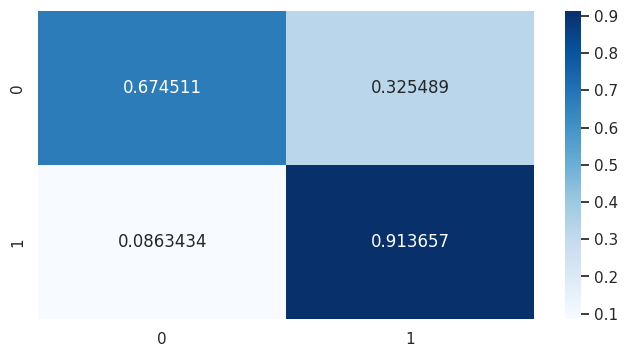

Accuracy_Score of LogisticRegression() model on Training Data is: 79.30947108895849
Accuracy_Score of LogisticRegression() model on Testing Data is: 79.30193080417637
Precision Score of LogisticRegression() model is: 0.7332378004509152
Recall Score of LogisticRegression() model is: 0.9208499341087987
AUC Score of LogisticRegression() model is: 0.8677924445054985

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


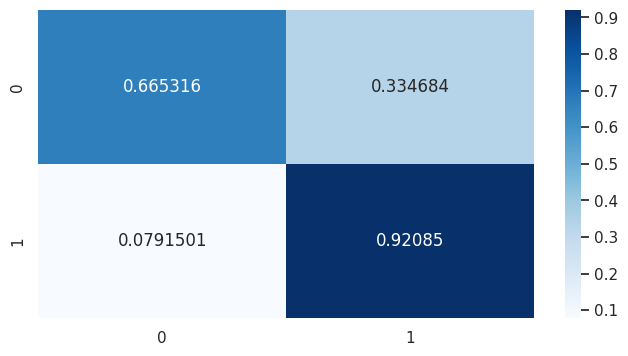

In [38]:
lr_all = model_prediction(LogisticRegression(),x_train,x_test)
lr_8 = model_prediction(LogisticRegression(),x_train_selecetd,x_test_selecetd)

In [39]:
# rfc=RandomForestClassifier(random_state=42)
# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth' : [5,10,15,20],
#     'criterion' :['gini', 'entropy']
# }
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

# CV_rfc.fit(x_train, y_train)

In [40]:
# CV_rfc.best_params_

In [ ]:
rfc_all = model_prediction(RandomForestClassifier(random_state=42),x_train,x_test)
rfc_8 = model_prediction(RandomForestClassifier(random_state=42),x_train_selecetd,x_test_selecetd)

In [ ]:
# ada=AdaBoostClassifier(random_state=42)
# param_grid = { 
#     'n_estimators': [100, 250 ,500],
#     'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
# }
# CV_ada = GridSearchCV(estimator=ada, param_grid=param_grid, cv= 5)

# CV_ada.fit(x_train, y_train)

# CV_ada.best_params_

In [ ]:
# ada_final = model_prediction(AdaBoostClassifier())

In [ ]:
# grad_boost=GradientBoostingClassifier(random_state=42)
# param_grid = { 
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#     "max_depth":[3,5,8],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.6, 0.8, 0.9, 1.0],
#     "n_estimators":[100,250,500]    
# }
# CV_grad_boost = GridSearchCV(estimator=grad_boost, param_grid=param_grid, cv= 5)

# CV_grad_boost.fit(x_train, y_train)

# CV_grad_boost.best_params_

In [ ]:
# grad_boost_final = model_prediction(GradientBoostingClassifier())

In [ ]:
from catboost import CatBoostClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV

In [ ]:
# Parameter distribution
catboost_param_dist = {
    'depth': [5,7,9],
    'learning_rate': [0.1,0.2,0.3],
    'iterations': [100,500,900]
#     'l2_leaf_reg': randint(1, 10),
#     'border_count': randint(1, 255),
#     'bagging_temperature': uniform(0.0, 1.0),
#     'random_strength': uniform(0.0, 1.0)
}

In [ ]:
# Initialize CatBoost Classifier
# CB = CatBoostClassifier(depth=7,
#                         learning_rate=0.2,
#                         l2_leaf_reg=5,
# #                         eval_metric='AUC',
#                         leaf_estimation_method='Newton',
#                         task_type="GPU",
#                         devices='0-1')

# Fit the model
# model = model_prediction(CB)

In [ ]:
CB = CatBoostClassifier(task_type="GPU")
# Setup RandomizedSearchCV
grid_search_cb = GridSearchCV(estimator=CB,
                              param_distributions=catboost_param_dist,
                              cv=5,
                              verbose=2,
                              random_state=42)

In [ ]:
grid_search_cb.best_params_

In [ ]:
# model = model_prediction(CatBoostClassifier(learning_rate=0.25,
#                            verbose=True))

In [ ]:
# op_rf = model.predict(pg_test)
# op=pd.DataFrame(sample['id'])
# op['Response']=op_rf
# op.to_csv("submission.csv", index=False)

# **-----------------End Of Project----------------------**